<a href="https://colab.research.google.com/github/Farzad-Es2023/deep-learning-projects/blob/main/PYtorchNN_code_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## mostly used functions:

1. accuracy function :

In [ ]:
# accuracy function:
def acc_fn(output,target):
 correct = torch.eq(target, output).sum().item() # torch.eq() calculates where two tensors are equal
 acc = (correct / len(output)) * 100
 return acc

2. Plotting decision boundaries:

In [ ]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

## 0- A simple linear regression model

read the **explanations**, they are useful.

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
 # creating Data:
 weight =0.5
 bias = 0.1
 start=0
 end=1
 step=0.02
 X = torch.arange(start,end,step=step).unsqueeze(dim=1)
 y = weight*X + bias

`X = torch.arange(start,end,step=step).unsqueeze(dim=1)` #The `unsqueeze(dim=1)` function is then applied to this 1D tensor. The `unsqueeze() `function adds a new dimension to the tensor at the specified dimension index. In this case, `dim=1` means that a new dimension will be added at the second dimension (the first dimension is the batch dimension, which is not explicitly specified here).Many Pytorch models, such as linear regression or neural networks, expect the input data to have a 2D shape, with the first dimension representing the batch size and the second dimension representing the features

In [ ]:
# Splitting data with 80% training and 20% testing data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
# Visualizing train/test/prediction data
def plotprediction(training_data=X_train,training_label=y_train,
 test_data=X_test,test_label= y_test ,prediction= None):
  plt.scatter(training_data,training_label,c='b',label='Training data')
  plt.scatter(test_data,test_label,c='g',label='Testing data')
  if prediction is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label='Predictions')
  plt.legend()
  plt.title('train/test data')

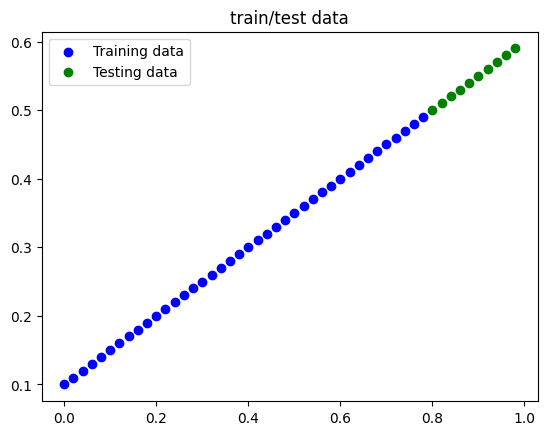

In [ ]:
plotprediction()

In [ ]:
# Create an one layer model

class mylinearreg(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
  def forward(self, x:torch.tensor)-> torch.tensor:
      return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(43)
model_0= mylinearreg()
model_0, model_0.state_dict()

(mylinearreg(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[-0.0921]])),
              ('linear_layer.bias', tensor([-0.6070]))]))

`self.linear_layer=nn.Linear(in_features=1,out_features=1)`


linear_layer is an instance attribute, "linear_layer" is not a default name and can be changed as per your preference.

`def forwrd(self, x:torch.tensor)-> torch.tensor:`

  The colon (:) after the argument name is followed by the type annotation, which indicates that the input x should be a torch.Tensor object. `-> torch.Tensor:` This is the return type annotation, which specifies that the function will return a torch.Tensor object.

In [ ]:
#creating Loss function and optimizer
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)


In [ ]:
#Training/Testing loop
torch.manual_seed(43)
epoch=100
Lossr=[] # these are for storing loss values evere 10 epoch, we use these values for visualizing.they are not needed for training process and can be removed as well as 3 line codes at the bottom of this cell
Loss_testr=[]
epochr=[]
for epoch in range(epoch):
  #Training loop:
  model_0.train()
  #forward method
  output=model_0(X_train)

  Loss=loss_fn(output,y_train) # first argument of this functio is real outpout and secod is target

  optimizer.zero_grad()

  Loss.backward()

  optimizer.step()

  #Testing Loop:
  model_0.eval()
  with torch.inference_mode():
    predictions=model_0(X_test)
  Loss_test=loss_fn(predictions,y_test)
  if epoch %10==0:
    Lossr.append(Loss.detach().numpy()) # these 3 line codes is used in other cell for visualizing data
    Loss_testr.append(Loss_test.detach().numpy())
    epochr.append(epoch)
    print(f"epoch={epoch}| training loss is {Loss}|test lost is {Loss_test}")



epoch=0| training loss is 0.9379222989082336|test lost is 1.2204830646514893
epoch=10| training loss is 0.8227123022079468|test lost is 1.0857731103897095
epoch=20| training loss is 0.7075024843215942|test lost is 0.9510631561279297
epoch=30| training loss is 0.5922925472259521|test lost is 0.8163533210754395
epoch=40| training loss is 0.4770825505256653|test lost is 0.6816433668136597
epoch=50| training loss is 0.36187252402305603|test lost is 0.5469332933425903
epoch=60| training loss is 0.24666254222393036|test lost is 0.41222327947616577
epoch=70| training loss is 0.1314525306224823|test lost is 0.2775132358074188
epoch=80| training loss is 0.06580860912799835|test lost is 0.18020620942115784
epoch=90| training loss is 0.05133397504687309|test lost is 0.13440918922424316


In [ ]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2676]])),
             ('linear_layer.bias', tensor([0.1925]))])

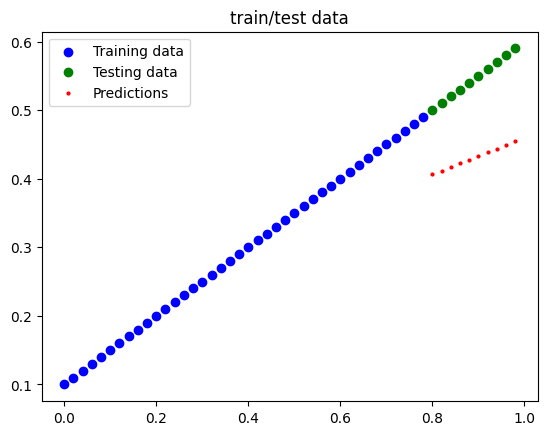

In [ ]:
plotprediction(prediction=predictions)

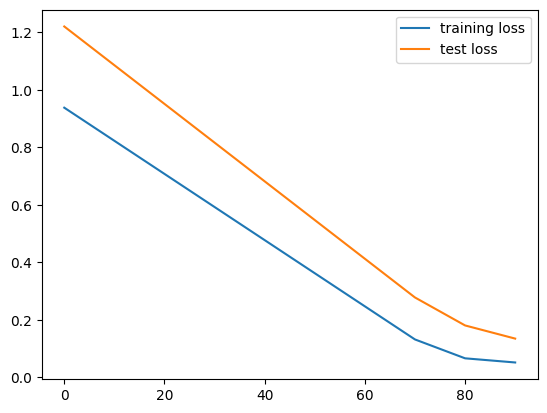

In [ ]:
import numpy as np
#plotting Loss curves
plt.plot(epochr,Lossr,label='training loss')
plt.plot(epochr,Loss_testr,label='test loss')
plt.legend()

## **1.** **Binary** (non-linear) **classification**
 related to 02 Pytorch classification course

In [ ]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

### **getting data ready**

importing dataset

In [ ]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same value


print(X.shape), print(y.shape), print(X.dtype), print(type(X))


(1000, 2)
(1000,)
float64
<class 'numpy.ndarray'>


(None, None, None, None)

In [ ]:
# convert to tensor ----> since Sklearn leverages Numpy, we should first convert data imported from it to tensors

X=torch.from_numpy(X)
X=X.type(torch.float32)

y=torch.from_numpy(y).unsqueeze(dim=1)
y=y.type(torch.float32)
#checking...
print(X.shape), print(y.shape), print(X.dtype), print(type(X))
print(y.dtype), print(type(y))

torch.Size([1000, 2])
torch.Size([1000, 1])
torch.float32
<class 'torch.Tensor'>
torch.float32
<class 'torch.Tensor'>


(None, None)

Visualizing

In [ ]:
# seeing data as a table (data frame):
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],"X2":X[:,1],"label":y.squeeze()}) #we get error if we do not use squeeze
circles.head()

,X1,X2,label
0,0.754246,0.231481,1.0
1,-0.756159,0.153259,1.0
2,-0.815392,0.173282,1.0
3,-0.393731,0.692883,1.0
4,0.442208,-0.896723,0.0


In [ ]:
circles.label.value_counts()

label
1.0    500
0.0    500
Name: count, dtype: int64

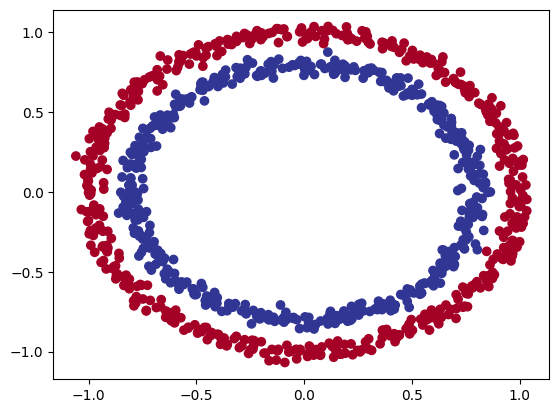

In [ ]:
# Plot
plotty=plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

# Adding legend
#legend_elements = plotty.legend_elements()[0]
#plt.legend(plotty.legend_elements()[0], ['y=1', 'y=0'])

splitting data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


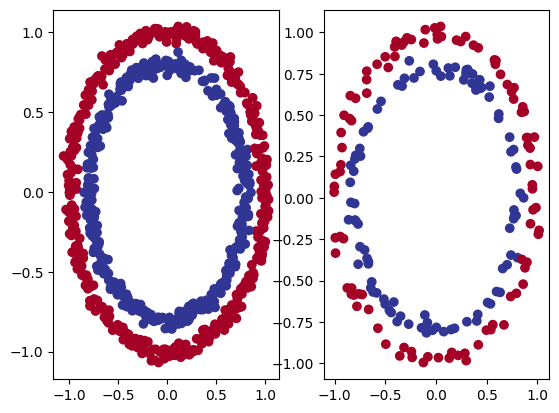

In [ ]:
# plot spllited data
plt.subplot(1,2,1).scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.RdYlBu)#index in subplot statrts from 1
plt.subplot(1,2,2).scatter(X_test[:,0],X_test[:,1],c=y_test,cmap=plt.cm.RdYlBu)

###defining **accuracy function** and **plot_decision_boundary** for measuring model efficacy in classification and visualizing results

In [ ]:
def acc_fn(output,target):
 correct = torch.eq(target, output).sum().item() # torch.eq() calculates where two tensors are equal
 acc = (correct / len(output)) * 100
 return acc

In [ ]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

### **Building a model**

1.building the model structure

In [ ]:
class model_BC(nn.Module):

 def __init__(self):
  super().__init__()
  self.layer_1=nn.Linear(in_features=2,out_features=10)
  self.layer_2=nn.Linear(in_features=10,out_features=10)
  self.layer_3=nn.Linear(in_features=10,out_features=1)
  self.relu=nn.ReLU()


 def forward(self,x):
  return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_0bc=model_BC()

2.defining Loss function and Optimizer

In [ ]:
Loss_fn=torch.nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_0bc.parameters(),lr=0.1)

3.Training/Testing for loop

In [ ]:
torch.manual_seed(42)
epochs=1000

for epoch in range(epochs):
 model_0bc.train()

 #3.1- forward pass
 ytrain_pred=model_0bc(X_train)

 #3.2- calculate the loss
 Loss=Loss_fn(ytrain_pred,y_train) #first argument for built_in loss functions is output and second one is target

 # 3.3- backpropagation and parameters update:
 optimizer.zero_grad()

 Loss.backward()

 optimizer.step()

 #Testing
 model_0bc.eval()

 with torch.inference_mode():
   ytest_pred=model_0bc(X_test)

   #calculating accuracy
   ytrainrounded=torch.round(torch.sigmoid(ytrain_pred))
   ytestrounded=torch.round(torch.sigmoid(ytest_pred))
   accuracytr=acc_fn(ytrainrounded,y_train)
   accuracytst=acc_fn(ytestrounded,y_test)
   Loss_test=Loss_fn(ytest_pred,y_test)

 #print out the results:

 if epoch %100==0:
  print(f"The train Loss is {Loss} and the test Loss is {Loss_test}| training accuracy is {accuracytr:.4f} and testing accuracy is {accuracytst:.4f}")


The train Loss is 0.6968845129013062 and the test Loss is 0.6977040767669678| training accuracy is 48.6250 and testing accuracy is 45.5000
The train Loss is 0.6916722059249878 and the test Loss is 0.69329434633255| training accuracy is 55.2500 and testing accuracy is 51.0000
The train Loss is 0.6887294054031372 and the test Loss is 0.6913856267929077| training accuracy is 55.1250 and testing accuracy is 53.0000
The train Loss is 0.6854485273361206 and the test Loss is 0.6894179582595825| training accuracy is 55.7500 and testing accuracy is 53.0000
The train Loss is 0.6809253096580505 and the test Loss is 0.6865903735160828| training accuracy is 57.7500 and testing accuracy is 54.5000
The train Loss is 0.6738414168357849 and the test Loss is 0.6816247701644897| training accuracy is 62.3750 and testing accuracy is 59.5000
The train Loss is 0.6614422798156738 and the test Loss is 0.6718910336494446| training accuracy is 70.8750 and testing accuracy is 65.0000
The train Loss is 0.638262569

Visualize the results (decision boundaries)

Text(0.5, 1.0, 'test data')

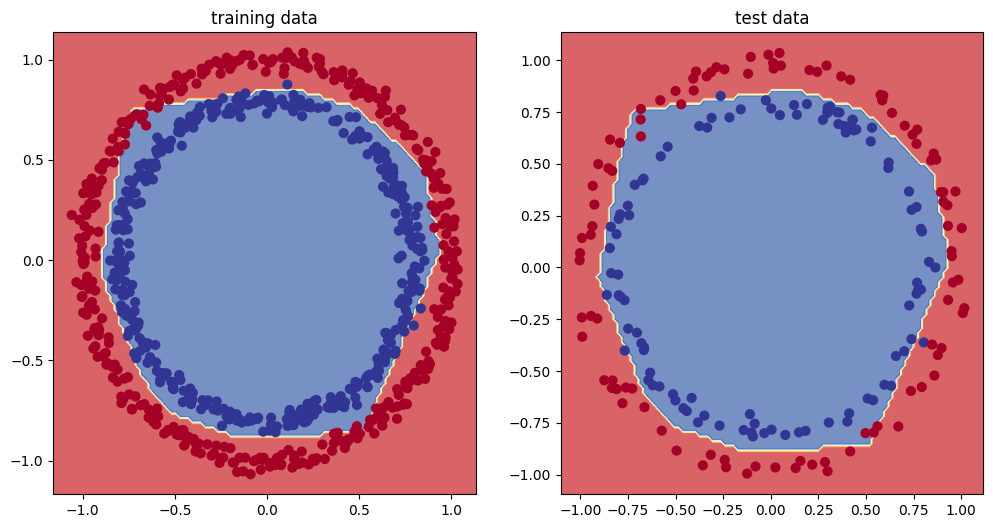

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plot_decision_boundary(model_0bc, X_train, y_train)
plt.title('training data')
plt.subplot(1,2,2)
plot_decision_boundary(model_0bc, X_test, y_test)
plt.title('test data')

## 2. **Multi class classification**  
related to 02 Pytorch classification course

In [ ]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

### 2.1. getting data ready

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

In [ ]:
type(X_blob)

numpy.ndarray

In [ ]:
X_blob=torch.from_numpy(X_blob).type(torch.float) # converting data type to float 32 that is default for tensors
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor) # based on an error and its suggestion we use this datatype


In [ ]:
print(y_blob.shape), print(X_blob.shape)

torch.Size([1000])
torch.Size([1000, 2])


(None, None)

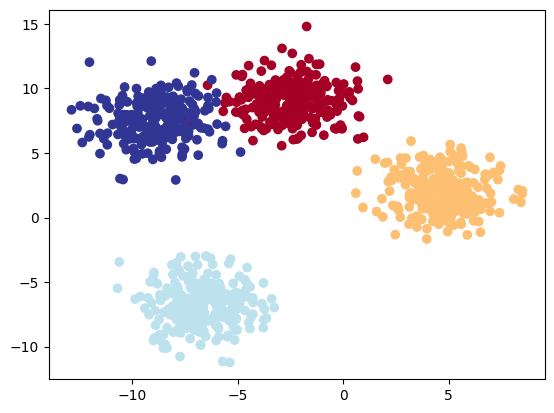

In [ ]:
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

**Note :** It seems that we can divide the plot with straight lines as decision boundaries. So, we can use linear layers to build a model and get desirable results. However, in this section we will use non linear activation functions. you can try the model without thse active functions and see that the result is the same.

In [ ]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test=train_test_split(X_blob,y_blob, test_size=0.2,random_state=42)

In [ ]:
X_blob_test.dtype, X_blob_train.dtype, y_blob_train.dtype

(torch.float32, torch.float32, torch.int64)

### 2.2. Building a model

In [ ]:
class blob_class(nn.Module):
  def __init__(self,input_dim=2,output_dim=4,hidden_neurons=10):
    super().__init__()

    self.layers=nn.Sequential(nn.Linear(in_features=input_dim, out_features=hidden_neurons), nn.ReLU(),nn.Linear(in_features=hidden_neurons, out_features=hidden_neurons), nn.ReLU(), nn.Linear(in_features=hidden_neurons, out_features=output_dim))

  def forward(self,x):
    return self.layers(x)

model_blob1=blob_class() # if the values are not set in the def__init  then we should assign values to variables here within the parenthesis.

In [ ]:
model_blob1(X_blob_train).shape , y_blob_train.shape

(torch.Size([800, 4]), torch.Size([800]))

In [ ]:
# yy=model_blob1(X_blob_test)
y_justtest=torch.softmax(model_blob1(X_blob_test),dim=1).argmax(dim=1)
print(y_justtest.shape)

torch.Size([200])


In [ ]:
print(y_blob_test.shape)

torch.Size([200])


**defining Loss function and Optimizer:**

In [ ]:
Loss_fn=nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_blob1.parameters(),
                            lr=0.1)

**Note:** The `nn.CrossEntropyLoss()` function expects the output logits(here y_preds) to have a shape of `[batch_size, num_classes]`, where `batch_size` is the number of samples, and `num_classes` is the number of output classes.and the ground truth labels to have a shape of `[batch_size]`, where each element is an integer representing the class index.

The Loss function first applies a softmax operation on the output logits `(y_preds)` to convert them into probabilities for each class.
It then computes the cross-entropy loss between the softmax probabilities and the ground truth labels `(y_blob_train)`.

In the code bellow the `y_preds` tensor with shape `[800, 4] `is interpreted as the output logits for 800 samples, each having 4 output classes. The `y_blob_train` tensor with shape `[800] `is interpreted as the ground truth class indices for the 800 samples.

https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html

**Train/Test Loop + calculating accuracy:**

In [ ]:
torch.manual_seed(42)
epochs=100
for epoch in range(epochs):
  model_blob1.train()
  y_preds=model_blob1(X_blob_train)
  Loss_tr=Loss_fn(y_preds,y_blob_train) # y_preds tensor shape: [800, 4]. y_blob_train tensor shape: [800]

  optimizer.zero_grad()
  Loss_tr.backward()
  optimizer.step()

  model_blob1.eval()
  with torch.inference_mode():
    y_pred_test=model_blob1(X_blob_test)
    y_pred_testreal=torch.softmax(y_pred_test,dim=1).argmax(dim=1)
    y_pred_trainreal=torch.softmax(y_preds,dim=1).argmax(dim=1)
    #acctest=acc_fn(y_pred_testreal,y_blob_test)
    #acctrain=acc_fn(y_pred_trainreal,y_blob_train)

  #if epoch %10==0:
   # print(f"train Loss :{Loss_tr} | train accuracy is {acctrain:.3f} % | test accuracy is : {acctest:.3f}%")





KeyboardInterrupt: 

**Visualize Results:**

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_blob1, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_blob1, X_blob_test, y_blob_test)

### Metrics to measure model performance:

In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics import Accuracy

#set up
accuracy_blob=Accuracy(task='multiclass', num_classes=4)

#Accuracy computation
accuracy_blob(y_pred_testreal,y_blob_test)

## 3. **Computer Vision**- CNN
related to 03 Pytorch computer vision course


* covered in this section: Data loader, Pytorch datasets,batched data,



  enumerate, Flatten, **functionizing Train/Test loop** ,

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

sample images in Dataset usually stored as a **tuple** (image, label). label type is int and image is numpy or torch with the shape of [#color channels, width, height].

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL(python image ...) format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:09<00:00, 2846003.03it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 311168.29it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3423475.42it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5593854.14it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
image0, target0 =train_data[0]  # according to FashionMnist dataset , when we call it it returns a tuple containing
                                # image and target/label. image is the 28*28 values and target is the index of the corresponding class.
image0

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [ ]:
image0.shape  # [1, 28, 28] means that it is a 3-dimensional tensor with 28 rows 28 columns for each two dimensional matrix. since it has 1 matrix, we see overall 28*28 elements here. we see that for above described output we have three [  means that it is a three dimensional tensor. the first dimension in image patterns is called color channel.

torch.Size([1, 28, 28])

In [ ]:
# How many samples are there?
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

The `dir()` function can be used to inspect the available attributes and methods for various datasets in the `torchvision.datasets` module.

here is how it works: creat an instance from dataset. for example in this case train_data is an instance of torchvision.dataset module:

`print(dir(train_data)) `

the output is like this:

['__add__', '__annotations__', '__class__', '_check_exists', '_check_legacy_exist', '_format_transform_repr', '_is_protocol', '_load_data', '_load_legacy_data', '_repr_indent', 'class_to_idx', ... 'classes', ...]


In [ ]:
print(dir(train_data))


['__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_exists', '_check_legacy_exist', '_format_transform_repr', '_is_protocol', '_load_data', '_load_legacy_data', '_repr_indent', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'mirrors', 'processed_folder', 'raw_folder', 'resources', 'root', 'target_transform', 'targets', 'test_data', 'test_file', 'test_labels', 'train', 'train_data', 'train_labels', 'training_file', 'transform', 'transforms']


### Visualize

(-0.5, 27.5, 27.5, -0.5)

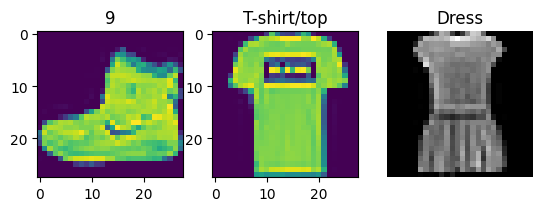

In [ ]:
import matplotlib.pyplot as plt
imag1, label1=train_data[0]
imag2, label2=train_data[1]
imag3, label3=train_data[3]

#plotting sample 0 of train data
plt.subplot(1,3,1)
plt.imshow(imag1.squeeze()) # using squeeze to remove extra dimension(since it is basically three dimensional)
plt.title(label1)

#plotting sample 1 of train data
plt.subplot(1,3,2)
plt.imshow(imag2.squeeze())
plt.title(class_names[label2])

#plotting sample 3 of train data
plt.subplot(1,3,3)
plt.imshow(imag3.squeeze(),cmap='gray')
plt.title(class_names[label3])
plt.axis(False)

**Data Loader:**

In [ ]:
# Using data loader:
from torch.utils.data import DataLoader
BATCH_SIZE=32

Train_batches=DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True) # DataLoader's output(here:Train_batches) consists of batches of data(here 60000/32). train_data = datasets.FashionMNIST(...)

Test_batches=DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=True)

Train_sample1image, Train_samplelabel1=next(iter(Train_batches)) #  'iter' works like a for Loop that iterate over the batches. 'next' function get the batch one by one. So by applying 'next' function one time we get the first batch,in second time we get second batch and so on. more explanation is in word file "Pytorch for deepNN".

print(Train_sample1image.shape)

print(len(Train_samplelabel1))

torch.Size([32, 1, 28, 28])
32


In [ ]:
test_data.targets[1]

tensor(2)

In [ ]:
sample_ofbatch=next(iter(Train_batches))
print(len(sample_ofbatch)) # the answer indicates that sample_ofbatch is a tuple that have two elements: data and label

2


Text(0.5, 1.0, 'Shirt')

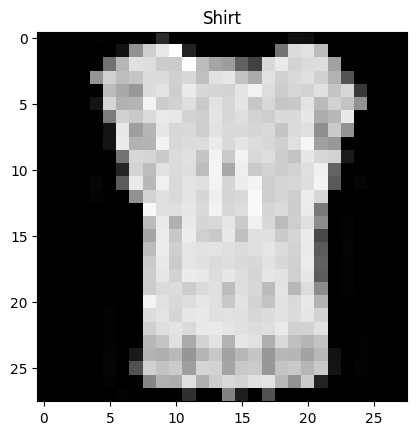

In [ ]:
# showing one sample of one batch

random_idx=torch.randint(1,BATCH_SIZE,(1,))#Third argument is size. here size is (1,), which creates a tensor of shape (1,), i.e., a 1-dimensional tensor with a single element.
sample1=Train_sample1image[random_idx].squeeze()
label1=Train_samplelabel1[random_idx]
plt.imshow(sample1,cmap='gray')
plt.title(class_names[label1])


###**Building a Model-0**

In [ ]:
from torch import nn
#first we start with a linear model

class Fashion_Mnist(nn.Module):
  def __init__(self, input_features, hidden_neurons, output_features):
    super().__init__()
    self.stack_Layers=nn.Sequential(nn.Flatten(), nn.Linear(input_features,hidden_neurons),nn.Linear(hidden_neurons,output_features) )

  def forward(self,x):
    return self.stack_Layers(x)

The `nn.Flatten()` layer took our shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

Why do this?

Because we've now turned our pixel data from height and width dimensions into one long **feature vector**.

And `nn.Linear()` layers like their inputs to be in the form of feature vectors.

So, we create our first model using `nn.Flatten()` as the first layer.

It should be noted that all nn modules act as a model (can do a forward pass)

In [ ]:
Input_Features=784
Hidden_Neurons=10
Output_Features=10

model_fashion0=Fashion_Mnist(Input_Features, Hidden_Neurons, Output_Features)

In [ ]:
model_fashion0

Fashion_Mnist(
  (stack_Layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
# Optimizer and Loss function

loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some contexts

optimizer = torch.optim.SGD(params=model_fashion0.parameters(), lr=0.1)

**tqdm**

is a Python library that provides a simple way to add progress bars to your Python scripts. It's particularly useful when working with long-running tasks, such as training machine learning models, processing large datasets, or running computationally intensive operations.



The basic usage of tqdm involves wrapping an iterable (such as a list, range, or dataloader) with the tqdm() function. The most common arguments are:

iterable: The iterable object you want to iterate over and display a progress bar for.

**Example1**:

`for i in tqdm(range(1000), desc="Processing items"):`
    # Do some work
    pass


**Example2**:

`for batch, (X, y) in tqdm(enumerate(train_dataloader), desc="Training batches", total=len(train_dataloader)):`
    # Train the model on the batch
    pass



**enumerate()**:

The `enumerate()` function in Python is used to iterate over a sequence (such as a list, tuple, or iterable) while keeping track of the index or position of each element.
in the code bellow, the `enumerate()` function is used to iterate over the Train_batches iterable. For each iteration, it returns two values:

`batch_idx`: The index of the current batch (starting from 0)

`(X, y)`: A tuple containing the input data X and the corresponding labels y for the current batch.

So, inside the loop, you can access the current batch index (`batch_idx`) and the input data (X) and labels (y) for that batch.

This pattern is commonly used when working with PyTorch dataloaders, as it allows you to easily access the batches of data and their corresponding labels during training or evaluation.

### Creating a training loop and training a model on batches of data

Let's step through it:

1.Loop through epochs.

2.Loop through training batches, perform training steps, calculate the train loss per batch.

3.Loop through testing batches, perform testing steps, calculate the test loss per batch.


In [ ]:
# accuracy function:
def acc_fn(output,target):
 correct = torch.eq(target, output).sum().item() # torch.eq() calculates where two tensors are equal
 acc = (correct / len(output)) * 100
 return acc

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm
from timeit import default_timer as timer

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start= timer() #we will use Timer function to finally calculate the time spent for training

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 8

# Create training and testing loop
for epoch in tqdm(range(epochs)):
  Train_Loss=0
  print(f"epoch {epoch} : \n----------")
  for batch_idx, (X,y) in enumerate(Train_batches):
    model_fashion0.train()
    y_pred=model_fashion0(X)
    tr_loss=loss_fn(y_pred,y)
    Train_Loss+=tr_loss

    optimizer.zero_grad()
    tr_loss.backward()
    optimizer.step()

  Train_Loss /= len(Train_batches)

 #Testing:
  Test_Loss, Testaccuracy = 0, 0
  with torch.inference_mode():
    model_fashion0.eval()
    for batch_idxt, (X,y) in enumerate(Test_batches):
      y_predtest=model_fashion0(X)
      tstloss=loss_fn(y_predtest,y)
      Test_Loss+=tstloss
      y_predtestacc=torch.softmax(y_predtest,dim=1).argmax(dim=1)

      Test_acc=acc_fn(y_predtestacc,y)
      Testaccuracy+=Test_acc



    Test_Loss /= len(Test_batches) #They should be within "inference_mode" otherwise we get error
    Testaccuracy /= len(Test_batches)

  print(f"Train Loss is: {Train_Loss} | Test Loss is: {Test_Loss} | Test accuracy is: {Testaccuracy}")


train_time_end= timer()
training_time=train_time_end - train_time_start
print(f"Training time duration is :{training_time}")



  0%|          | 0/8 [00:00<?, ?it/s]

epoch 0 : 
----------
Train Loss is: 0.47585833072662354 | Test Loss is: 0.4814874827861786 | Test accuracy is: 83.12699680511182
epoch 1 : 
----------
Train Loss is: 0.4534832239151001 | Test Loss is: 0.5211654901504517 | Test accuracy is: 81.94888178913737
epoch 2 : 
----------
Train Loss is: 0.44245579838752747 | Test Loss is: 0.5127664804458618 | Test accuracy is: 82.94728434504792
epoch 3 : 
----------
Train Loss is: 0.43596792221069336 | Test Loss is: 0.46878618001937866 | Test accuracy is: 83.32667731629392
epoch 4 : 
----------
Train Loss is: 0.43047723174095154 | Test Loss is: 0.4646110534667969 | Test accuracy is: 83.71605431309904
epoch 5 : 
----------
Train Loss is: 0.4242740273475647 | Test Loss is: 0.5011433959007263 | Test accuracy is: 82.50798722044729
epoch 6 : 
----------
Train Loss is: 0.4236816465854645 | Test Loss is: 0.4703879654407501 | Test accuracy is: 83.47643769968052
epoch 7 : 
----------
Train Loss is: 0.42003118991851807 | Test Loss is: 0.487339049577713 |

### **Functionizing trainning and testing**

the functions goes through batches of data

In [ ]:
# functionizing the training loop for batches of data in one epoch

def train_step(model,Train_batches,loss_fn,optimizer,acc_fn):  #the way it is defined in the course: def train_step(model: torch.nn.Module,data_loader: torch.utils.data.DataLoader,loss_fn: torch.nn.Module,optimizer: torch.optim.Optimizer,accuracy_fn,):  >>>> in this way it defines the types of variables too

  Train_Loss, Trainaccuracy= 0, 0
  for batch_idx, (X,y) in enumerate(Train_batches):
    model.train()
    y_pred=model(X)
    tr_loss=loss_fn(y_pred,y)
    Train_Loss+=tr_loss

    optimizer.zero_grad()
    tr_loss.backward()
    optimizer.step()
    y_predtrainacc=torch.softmax(y_pred,dim=1).argmax(dim=1)
    Train_acc=acc_fn(y_predtrainacc,y)
    Trainaccuracy+=Train_acc

  Train_Loss /= len(Train_batches)
  Trainaccuracy /= len(Train_batches)
  return Train_Loss, Trainaccuracy


# functionizing the testing loop for batches of data in one epoch

def test_step(model,Test_batches,loss_fn,acc_fn):
  Test_Loss, Testaccuracy = 0, 0

  model.eval()
  with torch.inference_mode():
    for batch_idx, (X,y) in enumerate(Test_batches):
      y_predtest=model(X)
      tst_loss=loss_fn(y_predtest,y)
      Test_Loss+=tst_loss
      y_predtestacc=torch.softmax(y_predtest,dim=1).argmax(dim=1)
      Test_acc=acc_fn(y_predtestacc,y)
      Testaccuracy+=Test_acc

    Test_Loss /= len(Test_batches)
    Testaccuracy /= len(Test_batches)
    return Test_Loss, Testaccuracy


**Rerun the model with functions defined above**

In [ ]:
# Rerunning the model with those functions


from tqdm.auto import tqdm
from timeit import default_timer as timer


torch.manual_seed(42)
train_time_start= timer()


epochs = 8


for epoch in tqdm(range(epochs)):

  print(f"epoch {epoch} : \n----------")

  Train_Loss, Trainaccuracy=train_step(model=model_fashion0,Train_batches=Train_batches,loss_fn=loss_fn,optimizer=optimizer,acc_fn=acc_fn)


  Test_Loss, Testaccuracy=test_step(model=model_fashion0,Test_batches=Test_batches,loss_fn=loss_fn,acc_fn=acc_fn)




  print(f"Train Loss is: {Train_Loss} | Train accuracy is: {Trainaccuracy} | Test Loss is: {Test_Loss} | Test accuracy is: {Testaccuracy}")


train_time_end= timer()
training_time=train_time_end - train_time_start
print(f"Training time duration is :{training_time}")

# In Python, once you return a variable from a function, the variable itself is not accessible by its original name outside of that function unless it is explicitly returned and assigned to a variable in the calling scope

  0%|          | 0/8 [00:00<?, ?it/s]

epoch 0 : 
----------
Train Loss is: 0.40439656376838684 | Train accuracy is: 85.73 | Test Loss is: 0.45538511872291565 | Test accuracy is: 84.06549520766774
epoch 1 : 
----------
Train Loss is: 0.40229105949401855 | Train accuracy is: 85.805 | Test Loss is: 0.48205360770225525 | Test accuracy is: 83.16693290734824
epoch 2 : 
----------
Train Loss is: 0.4022565186023712 | Train accuracy is: 85.855 | Test Loss is: 0.5076719522476196 | Test accuracy is: 82.95726837060703
epoch 3 : 
----------
Train Loss is: 0.4015989303588867 | Train accuracy is: 85.87833333333333 | Test Loss is: 0.45923271775245667 | Test accuracy is: 83.4564696485623
epoch 4 : 
----------
Train Loss is: 0.4008944034576416 | Train accuracy is: 85.85833333333333 | Test Loss is: 0.45962026715278625 | Test accuracy is: 83.92571884984025
epoch 5 : 
----------
Train Loss is: 0.3983157277107239 | Train accuracy is: 86.00833333333334 | Test Loss is: 0.5174314975738525 | Test accuracy is: 82.3682108626198
epoch 6 : 
----------


### **Building a model-1 (CNN model)**

There are several kinds of CNN, however
The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/#article-input).

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements.

more specifically the model we're going to build here is like the image bellow :

As you can see here there are two blocks of layers here.


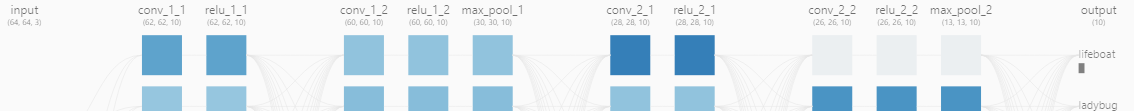

In [ ]:
class fashion_Cnn(nn.Module):
  def __init__(self,input_shape:int,hidden_neurons:int,output_shape:int):
    super().__init__()
    self.block_1=nn.Sequential(nn.Conv2d(in_channels=input_shape, out_channels=hidden_neurons, kernel_size=3,stride=1, padding=1),nn.ReLU(),
                               nn.Conv2d(in_channels=hidden_neurons, out_channels=hidden_neurons, kernel_size=3,stride=1, padding=1),nn.ReLU(),
                               nn.MaxPool2d(kernel_size=2,
                         stride=2))

    self.block_2=nn.Sequential(nn.Conv2d(in_channels=hidden_neurons, out_channels=hidden_neurons, kernel_size=3,stride=1, padding=1),nn.ReLU(),
                               nn.Conv2d(hidden_neurons, hidden_neurons, kernel_size=3,stride=1, padding=1), nn.ReLU(),
                               nn.MaxPool2d(kernel_size=2,
                         stride=2),
                               )

    self.classifier = nn.Sequential(nn.Flatten(),nn.Linear(in_features=hidden_neurons*7*7 ,out_features=output_shape))
# to calculate inputshape for nn.Linear :one way is to calculate data shape step by step from begining till the output of nn.Maxpool of block2. another tricky way is to create a dummy input data and feed it into network while commenting out the self classifier, and then print the shape of block_2 output. in this way we obtain the shape sth like this (hidden_neurons,7,7). So, after flatting the input shape becomes hidden_neurons*7*7.
  def forward(self,x):
    x=self.block_1(x)
    x=self.block_2(x)
    x=self.classifier(x)
    return x

In [ ]:
# calculation of inputshape in nn.Linear (line 15) by creating dummy input file

model_fashion1=fashion_Cnn(input_shape=1,hidden_neurons=10,output_shape=10) #we should first comment out the lines 15 and 20

X=torch.rand([1,1,28,28])# dummy input
print(X.shape)
output=model_fashion1(X)
print(output.shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 10])


In [ ]:

out=torch.flatten(output)
print(out.shape)
Lin=nn.Linear(490,10)
out2=Lin(out)
print(out2.shape)

torch.Size([490])
torch.Size([10])


In [ ]:
model_fashion1=fashion_Cnn(input_shape=1,hidden_neurons=10,output_shape=10)

In [ ]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_fashion1.parameters(),lr=.01)

In [ ]:
from tqdm.auto import tqdm

Epochs=10

for epoch in tqdm(range(Epochs)):
  print(f"epoch {epoch} : \n----------")

  Train_Loss, Trainaccuracy=train_step(model=model_fashion1,Train_batches=Train_batches,loss_fn=loss_fn,optimizer=optimizer,acc_fn=acc_fn)


  Test_Loss, Testaccuracy=test_step(model=model_fashion1,Test_batches=Test_batches,loss_fn=loss_fn,acc_fn=acc_fn)




  print(f"Train Loss is: {Train_Loss} | Train accuracy is: {Trainaccuracy} | Test Loss is: {Test_Loss} | Test accuracy is: {Testaccuracy}")


  0%|          | 0/10 [00:00<?, ?it/s]

epoch 0 : 
----------
Train Loss is: 1.2821309566497803 | Train accuracy is: 52.41166666666667 | Test Loss is: 0.6090866923332214 | Test accuracy is: 78.3047124600639
epoch 1 : 
----------
Train Loss is: 0.5222025513648987 | Train accuracy is: 81.00166666666667 | Test Loss is: 0.4646032154560089 | Test accuracy is: 83.58626198083067
epoch 2 : 
----------
Train Loss is: 0.4391993284225464 | Train accuracy is: 84.13833333333334 | Test Loss is: 0.4345841705799103 | Test accuracy is: 84.53474440894568
epoch 3 : 
----------
Train Loss is: 0.3997292220592499 | Train accuracy is: 85.65833333333333 | Test Loss is: 0.39744266867637634 | Test accuracy is: 86.2120607028754
epoch 4 : 
----------
Train Loss is: 0.37377870082855225 | Train accuracy is: 86.71 | Test Loss is: 0.41221320629119873 | Test accuracy is: 84.96405750798722
epoch 5 : 
----------
Train Loss is: 0.356720507144928 | Train accuracy is: 87.20833333333333 | Test Loss is: 0.3710820972919464 | Test accuracy is: 87.25039936102236
epoc

In [ ]:
# Saving Model parameters:

from google.colab import drive
drive.mount('/content/drive')
import torch

# Assuming 'model' is your trained model
torch.save(model_fashion1.state_dict(), '/content/drive/My Drive/Colab_Notebooks/Pytorch-full-from-youtube-course/03CNN_model_parameters.pth')


Mounted at /content/drive


###**Prediction**

In [ ]:
#Initialization: (Loading Model Parameters)

import torch
from torch import nn
from google.colab import drive
drive.mount('/content/drive')

# After running the model Structure (running  the Cell containing the model structure) --- re-training is not needed

model_fashion1.load_state_dict(torch.load('/content/drive/My Drive/Colab_Notebooks/Pytorch-full-from-youtube-course/03CNN_model_parameters.pth')
)
model_fashion1.eval()


Mounted at /content/drive


fashion_Cnn(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# making a List of random samples:


import numpy as np
import torch
import random
torch.manual_seed(42)

test_sample=[]
test_label=[]

for sample , label in random.sample(list(test_data), k=9):
  test_sample.append(sample)
  test_label.append(label)

'pred_labels=[]\ndef pred_fn(Model:torch.nn.Module, data):\n  for sample in data:\n    pred_labels.append(torch.softmax(torch.squeeze(Model(sample)),dim=0).argmax(dim=1))\n  return pred_labels'

In [ ]:
#Defining the predict function

def pred_fn(Model:torch.nn.Module, data):
  pred_labels=[]
  for sample in data:
    pred_labels.append(torch.softmax(Model(torch.unsqueeze(sample,dim=0)),dim=1).argmax(dim=1))
  return pred_labels

###some small test to get intuition about what's going on :

In [ ]:
test_sample[0]


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.1490, 0.3451, 0.2941, 0.3490,
          0.1686, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157,
          0.0078, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.9961, 1.0000,
          1.0000, 0.0000, 0.0000, 0.0000, 0.0078, 0.0078, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0980, 0.5373, 0.9059, 0.9137, 0.8706, 0.9059,
          0.9333, 0.5608, 0.0431, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0157,
          0.5490, 0.9137, 0.9373, 0.9608, 0.9490, 0.9333, 0.8667, 0.9059,
          0.9412, 0.9569, 0.9176, 0.8588, 0.3490, 0.0000,

In [ ]:
b=torch.softmax(model_fashion1(torch.unsqueeze(test_sample[0],dim=0)),dim=1).argmax(dim=1)
print(b)

tensor([5])


In [ ]:
b.argmax(dim=1)

tensor([2])

In [ ]:
#model_fashion1(test_sample[0])
print(len(test_sample))
print(test_sample[0].shape)

9
torch.Size([1, 28, 28])


In [ ]:
output=pred_fn(model_fashion1,test_sample)
output

[tensor([5]),
 tensor([3]),
 tensor([5]),
 tensor([4]),
 tensor([3]),
 tensor([2]),
 tensor([0]),
 tensor([2]),
 tensor([0])]

###Doing prediction and visualizing the results

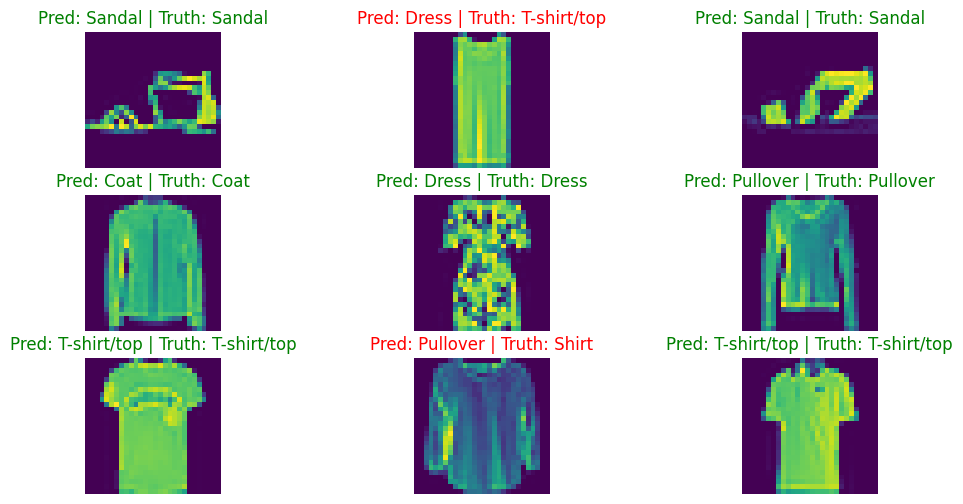

In [ ]:
#Plotting and comparing the results

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))

with torch.inference_mode():

 output=pred_fn(model_fashion1,test_sample)

for i, sample in enumerate(test_sample): # enumerate gives us both the index and data
  plt.subplot(3,3,i+1)
  plt.imshow(sample.squeeze())

  predicted_label=class_names[output[i].item()]
  truth_label=class_names[test_label[i]]
  text_title= f"Pred: {predicted_label} | Truth: {truth_label}"
  if predicted_label==truth_label: # if prediction is wrong the title would be in red color
    plt.title(text_title,c="g")
  else:
    plt.title(text_title,c="r")
  plt.axis(False)


###Confusion Matrix

The Course Lecturer uses `torch.metrics` and `mlxtend` that are not installed by default in Colab. However, I use `sklearn` here to make confusion Matrix. To see lecturer's code refer to the course material.

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Obtaining predicted labels for whole test_data
#This code is adopted from for loop of test_step function

with torch.inference_mode():
  y_pred_labels=[]
  truth_values=[]

  for batch_idx, (X,y) in enumerate(Test_batches):

    y_predtest=model_fashion1(X)

    y_predtestacc=torch.softmax(y_predtest,dim=1).argmax(dim=1)

    y_pred_labels.append(y_predtestacc)
    truth_values.append(y)


  y_pred_labels_tensor=torch.cat(y_pred_labels) #Each element of y_pred_labels is a tensor containing the predicted labels,so we use the cat function to concatenate a list of tensors (y_pred_labels) into a single tensor (y_pred_labels_tensor)
  truth_values_tensor=torch.cat(truth_values)


In [ ]:
#Building Confusion Matrix

cm = confusion_matrix(truth_values_tensor.numpy(), y_pred_labels_tensor.numpy())

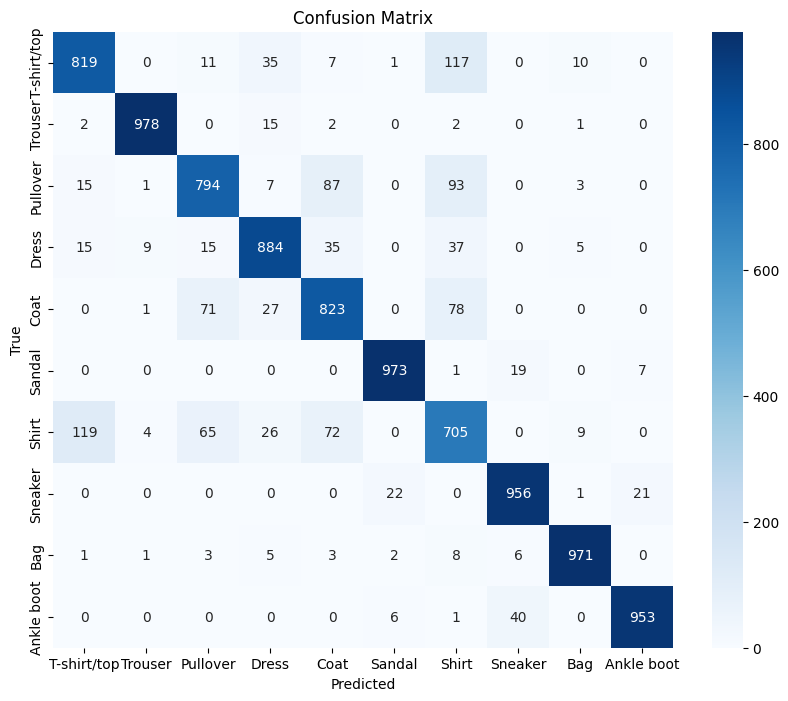

In [ ]:
#Plotting Confusion Matrix

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#4.**Creating a Custom Dataset** and Feeding It into a CNN Model for Training and Prediction.

*for more detailed explanation refer to the course material saved as a notebook in My drive named as"04_pytorch_custom_datasets"*

### 4.1 **Creating a dataset**

the writer/lecturer has made a zip file named '**pizza_steak_sushi**' containing two folders named '**test**' and '**train**' . each of those two folders contain **three** subfolders named 'pizza','steak' and 'sushi'.And in each subfolders there are several number of *jpg* images.

the bellow code is written to access this zip file, and download it to colab (as both zip and extracted(unzip) files ). you can see the tree branches of this loaded data in left side of the notebook by clicking on the Files icon.

needless to say that we can upload the file manually by clicking on Files >Upload in the left side of notebook.

it is worth mentioning that those loaded files are temporary, meaning that if the colab get disconnected they will be lost.

* **Acces and downloading the Images** as train/test folders with three
category of food as subfolders:

In [ ]:
import requests                  #A library used to make HTTP requests.
import zipfile                   #A module to work with ZIP files.
from pathlib import Path         #A class for handling filesystem paths in a more convenient way.

# Setup path to data folder
data_path = Path("data/")        #defining  a base directory
image_path = data_path / "pizzasteak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)                          #making a directory

    # Downloading the zip file containing Train and Test folders:
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f: #The name"pizza_steak_sushi" is an arbitrary name that we choose(not related to the original folder data we want to download). the data will be downloaded as this name under "pizzasteak_sushi" folder.
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")

        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)


    # Unzip pizza, steak, sushi data
    #it opens the ZIP file using zipfile.ZipFile and extracts its contents into the image_path directory using zip_ref.extractall(image_path).

    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizzasteak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


The folder that we extract the downloaded file(zip file) into it is 'pizzasteak_sushi'.

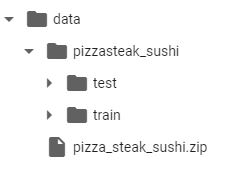



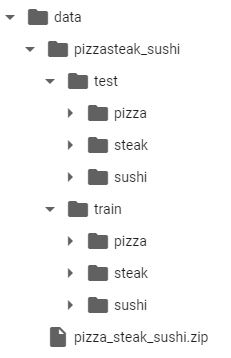



 * **inspect what's in our data directory** : by writing a small helper function to walk through each of the subdirectories and count the files present.

In [ ]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizzasteak_sushi'.
There are 3 directories and 0 images in 'data/pizzasteak_sushi/test'.
There are 0 directories and 31 images in 'data/pizzasteak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizzasteak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizzasteak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizzasteak_sushi/train'.
There are 0 directories and 72 images in 'data/pizzasteak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizzasteak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizzasteak_sushi/train/pizza'.


the continuation of setting up the path :

In [ ]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizzasteak_sushi/train'),
 PosixPath('data/pizzasteak_sushi/test'))

* **Visualize an Image**

- picking up an image

In [ ]:
import random
from PIL import Image
import matplotlib.pyplot as plt

# Set seed
#random.seed(42)

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

print(f"the image is a kind of {image_class}")

the image is a kind of steak


above code explanation:

`glob("*/*/*.jpg")`: This function is used to search for files matching a specified pattern. In this case, it looks for all .jpg files in subdirectories of `image_path`. The pattern` */*/*.jpg` means:
The first `*` matches any directory.
The second `*` matches any subdirectory within the first directory.
*.jpg matches any file that ends with `.jpg`.
`list(...)`: This converts the generator returned by glob into a list, storing all the found image paths in `image_path_list`.

`choice(image_path_list)`: This function randomly selects an item from the provided list `(image_path_list)`. It returns one of the image paths from the list.

`random_image_path`: This variable holds the path of a randomly selected image file.
`parent`: This attribute returns the parent directory of the file represented by `random_image_path`. In other words, it gives you the directory containing the image file.
`stem`: This property returns the name of the file without its extension. If the parent directory is considered as a class label, `image_class` will store that name.

`Image`: This refers to the `Image` class from the `PIL` (Pillow) library, which is used for opening, manipulating, and saving image files in Python.
`open(random_image_path)`: This method opens the image file located at `random_image_path`. The resulting object (`img`) can be used for further image processing or manipulation.

- plotting the image:

(-0.5, 511.5, 511.5, -0.5)

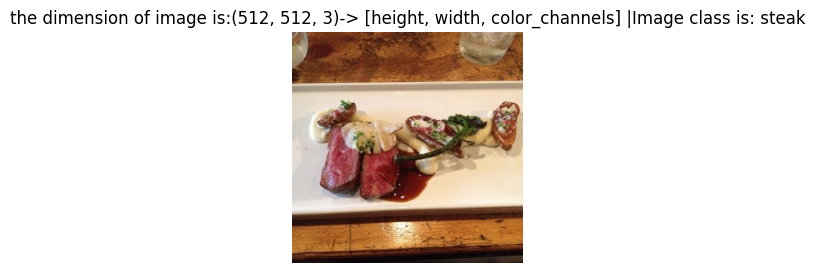

In [ ]:
import numpy as np
imgarray=np.asarray(img) # for plotting with plt the input data must be array, so we convert img to array.
plt.figure(figsize=(5, 3))
plt.imshow(img)
plt.title(f"the dimension of image is:{imgarray.shape}-> [height, width, color_channels] |Image class is: {image_class}")
plt.axis(False)

In [ ]:
imgarray.shape

(512, 512, 3)

In [ ]:
imgarray[0]

array([[133,  91,  51],
       [125,  86,  47],
       [135,  99,  65],
       ...,
       [167, 105,  48],
       [160,  94,  36],
       [171, 105,  47]], dtype=uint8)

- **Transforming data**

we must do the following actions on the data:

1.transform it to Tensor to be usable in Pytorch( it will also convert the original image array element's values which are in range of 0 to 255 to the values between 0 to 1)

2.flip some of data for '*data augmentation*' purpose. The idea of data augmentation is to artificially increase the diversity of the training set to better predict on the testing set. You usually don't perform data augmentation on the test set

3.resize the data

all of the above actions could be performed by the `Transform.compose`

**Note** : the format of images before transformaing(in array format) is `[height, width, color_channels]` however after transforming to Tensors they will be` [ color_channels, height, width]`

In [ ]:
import torch
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [ ]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64, 64)),
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

In [ ]:
Ima=data_transform(img)
Ima.shape

torch.Size([3, 64, 64])

In [ ]:
Ima

tensor([[[0.5569, 0.5294, 0.6118,  ..., 0.5137, 0.5529, 0.5255],
         [0.5216, 0.4784, 0.5255,  ..., 0.5294, 0.5333, 0.5451],
         [0.5529, 0.5333, 0.5176,  ..., 0.5686, 0.5255, 0.5412],
         ...,
         [0.0980, 0.0941, 0.0902,  ..., 0.3961, 0.4275, 0.4667],
         [0.2392, 0.2314, 0.2275,  ..., 0.2980, 0.3020, 0.3020],
         [0.1961, 0.2039, 0.2157,  ..., 0.1412, 0.1451, 0.1412]],

        [[0.3451, 0.3490, 0.4941,  ..., 0.3961, 0.4431, 0.4353],
         [0.3137, 0.2745, 0.3686,  ..., 0.4118, 0.3725, 0.4353],
         [0.3294, 0.3059, 0.3176,  ..., 0.4706, 0.3725, 0.3882],
         ...,
         [0.0627, 0.0549, 0.0510,  ..., 0.2000, 0.2235, 0.2549],
         [0.1882, 0.1804, 0.1843,  ..., 0.1373, 0.1451, 0.1412],
         [0.1529, 0.1647, 0.1686,  ..., 0.0706, 0.0745, 0.0745]],

        [[0.1529, 0.1843, 0.3647,  ..., 0.2863, 0.3490, 0.3490],
         [0.1294, 0.1176, 0.2431,  ..., 0.2863, 0.2275, 0.3255],
         [0.1373, 0.1333, 0.1647,  ..., 0.3569, 0.2275, 0.

**Plotting** three random samples of data **before and after transformation** :

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths.
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) # it places dim=1 into dim=0,dim=2 into dim=1 and dim=0 into dim=2 place
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16) #Adds a title to the entire figure, which can encompass multiple subplots.


above code(function) explanation :

`Image.open(image_path)`: This function opens the image file located at `image_path` and returns an image object.

The `f` in this context is simply a variable name that represents the image object opened by `Image.open(image_path)`.
The with statement is used for resource management and ensures that the image file is properly closed after its block of code is executed, even if an error occurs.

`with ... as f`: This syntax creates a context manager. The image object returned by `Image.open` is assigned to the variable `f`. When the block of code inside the with statement is exited, the image file is automatically closed.
`transform(f)`: This function takes the image object `f` as input and applies some transformation to it, returning the transformed image.

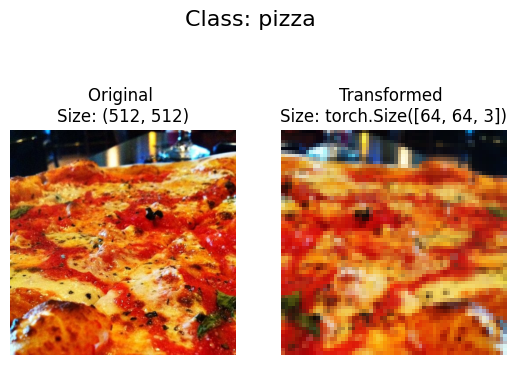

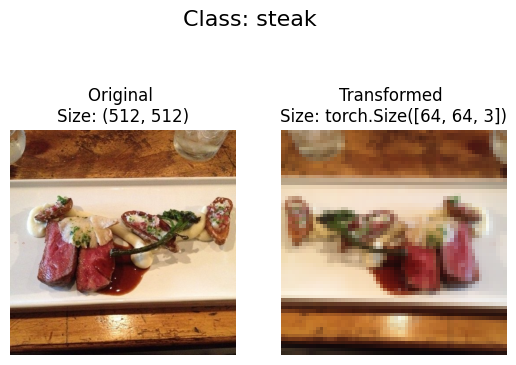

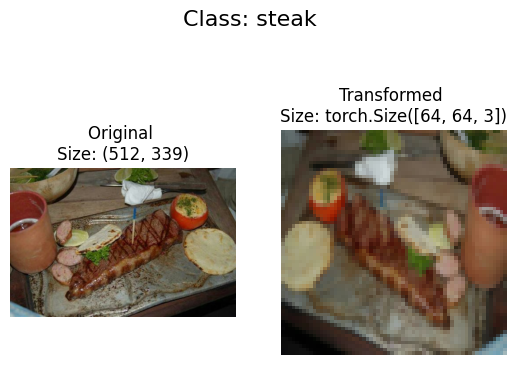

In [ ]:
plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

- **Forming data as a Dataset** (loaading data into a dataset)

**Option #1** : using [ImageFolder](https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#torchvision.datasets.ImageFolder)

other options to loading and also other built-in functions for Dataset:https://pytorch.org/vision/stable/datasets.html

`ImageFolder` has the ability to accept transform

In [ ]:
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,# target folder of images (that has been defined before) that is 'data/pizzasteak_sushi/train'
                               transform=data_transform, # transforms to perform on data (images)
                               target_transform=None)# transforms to perform on labels (if necessary)

#PosixPath('data/pizzasteak_sushi/train'),PosixPath('data/pizzasteak_sushi/test'))
test_data = datasets.ImageFolder(root=test_dir, # that is 'data/pizzasteak_sushi/test'
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizzasteak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizzasteak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


checking some of the common Dataset's charactristics(attributes) :

In [ ]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the lengths
len(train_data), len(test_data)

(225, 75)

In [ ]:
train_data[4]

(tensor([[[0.5059, 0.5020, 0.2431,  ..., 0.7098, 0.8745, 0.9216],
          [0.5451, 0.5020, 0.2353,  ..., 0.6941, 0.7490, 0.8902],
          [0.5647, 0.5529, 0.4000,  ..., 0.8078, 0.8000, 0.8314],
          ...,
          [0.8431, 0.8510, 0.8118,  ..., 0.9608, 0.9725, 0.9686],
          [0.6196, 0.7333, 0.7412,  ..., 0.9608, 0.9608, 0.9608],
          [0.5216, 0.7176, 0.7725,  ..., 0.9608, 0.9569, 0.9608]],
 
         [[0.2588, 0.2667, 0.1216,  ..., 0.5412, 0.7765, 0.8549],
          [0.2902, 0.2706, 0.1098,  ..., 0.4824, 0.5882, 0.7922],
          [0.3176, 0.3137, 0.2157,  ..., 0.6471, 0.6275, 0.6784],
          ...,
          [0.6431, 0.6627, 0.6235,  ..., 0.8078, 0.8196, 0.8157],
          [0.4627, 0.5412, 0.5294,  ..., 0.8118, 0.8157, 0.8118],
          [0.3882, 0.4941, 0.5569,  ..., 0.8078, 0.8078, 0.8157]],
 
         [[0.1020, 0.1098, 0.0627,  ..., 0.3569, 0.6118, 0.7176],
          [0.1098, 0.1098, 0.0549,  ..., 0.2745, 0.4000, 0.6431],
          [0.1176, 0.1098, 0.0863,  ...,

In [ ]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

**Plotting a single image(sample) from Dataset**

**Note**: Right now our image dimensions are in the format CHW (color channels, height, width) but matplotlib prefers HWC (height, width, color channels)

(-0.5, 63.5, 63.5, -0.5)

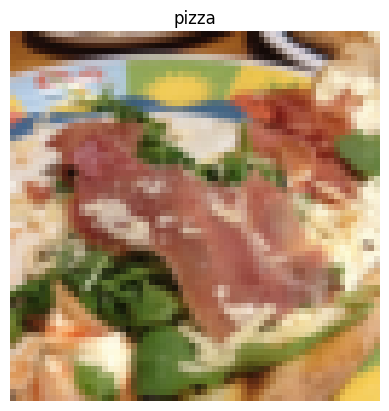

In [ ]:
import matplotlib.pyplot as plt
sample4=train_data[4][0].permute(1,2,0)
plt.imshow(sample4)
plt.title(class_names[train_data[4][1]])
plt.axis(False)

- **Creating a Data Loader**

In [ ]:
from torch.utils.data import DataLoader

batch_size=32

train_batches=DataLoader(train_data,batch_size,shuffle=True)
test_batches=DataLoader(test_data,batch_size,shuffle=True)


showing length of each batch data

In [ ]:
Train_sample1image, Train_samplelabel1=next(iter(train_batches))

print(Train_sample1image.shape)

print(len(Train_samplelabel1))

-  **Forming data as a Dataset** (loaading data into a dataset)

**Option #2** : creating your own functions to load data

the functions can be used to load any data ( it is like replicating *ImageFolder* function).

In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

above `import` code explanation :

Python's `os` for dealing with directories (our data is stored in directories).

Python's `pathlib` for dealing with filepaths (each of our images has a unique filepath).

`torch` for all things PyTorch.

`PIL`'s Image class for loading images.

`torch.utils.data.Dataset` to subclass and create our own custom Dataset.

`torchvision.transforms` to turn our images into tensors.

Various types from Python's `typing` module to add type hints to our code.

In [ ]:
# Setup path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path / "train"))])
print(f"Class names found: {class_names_found}")

Target directory: data/pizzasteak_sushi/train
Class names found: ['pizza', 'steak', 'sushi']


- **function** :

 turn above code to a function (Making a function to find classes in the target directory)

In [ ]:
def findclassess(directory:str):
  print(f"Target directory: {directory}")
  class_names=sorted([entry.name for entry in list(os.scandir(directory))])
  if not class_names:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.")
  class_to_idx={cls_nm:i for i, cls_nm in enumerate(class_names)}
  return class_names, class_to_idx


In [ ]:
findclassess(train_dir)

Target directory: data/pizzasteak_sushi/train


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

- **replicating** `ImageFolder` :

 suppose we have created our directory of Images (based on a standard structure) and now we want to create dataset without using pre-built `ImageFolder` i.e creating our own class which loads Images and creates a dataset.

this class uses the functions defined before like: `findclassess`  
so should we run them before running the class

In [ ]:
# OUR OWN CLASS

from torch.utils.data import Dataset

class custom_Imagfolder(Dataset):
  def __init__(self,targ_dir,transform=None):
    self.path=list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform=transform
    self.classes , self.class_to_idx = findclassess(targ_dir)

 #Make function to load images : "Opens an image via a path and returns it."
  def load_image(self,index):
    image_path=self.path[index]
    return Image.open(image_path)

  #5. Overwrite the __len__() method (optional but recommended for subclasses of torch.utils.data.Dataset)
  def __len__(self):
    "Returns the total number of samples."
    return len(self.path)

  # Overwrite the __getitem__() method (required for subclasses of torch.utils.data.Dataset)
  #Now you might think that how is it different from the built-in indexer [] operator? Wherever you use this notation, python automatically calls the __getitem__ method for you and is the shorthand for accessing elements. But if you want to change the behavior of indexing for custom objects, you need to explicitly call the __getitem__ method.
  def __getitem__(self,idx:int):
    img = self.load_image(idx)
    class_name  = self.path[idx].parent.name # expects path in data_folder/class_name/image.jpeg
    class_idx = self.class_to_idx[class_name]
    # Transform if necessary
    if self.transform:
        return self.transform(img), class_idx # return data, label (X, y)
    else:
        return img, class_idx # return data, label (X, y)


**building Transforms**

In [ ]:
#making transforms to be used when creating train data with our own custom dataset. this transform will be used as one of the arguments for the class.
train_transforms=transforms.Compose([transforms.Resize((64,64)),
                                     transforms.RandomHorizontalFlip(p=0.5),
                                     transforms.ToTensor()])

# Don't augment test data, only reshape
test_transforms=transforms.Compose([transforms.Resize((64,64)),
                                     transforms.ToTensor()])

- Now, **creating dataset with our own custom dataset**

In [ ]:
train_data_custom = custom_Imagfolder(targ_dir=train_dir,
                                      transform=train_transforms)
test_data_custom = custom_Imagfolder(targ_dir=test_dir,
                                     transform=test_transforms)

Target directory: data/pizzasteak_sushi/train
Target directory: data/pizzasteak_sushi/test


In [ ]:
train_data_custom, test_data_custom

(<__main__.custom_Imagfolder at 0x7d41ffd3da20>,
 <__main__.custom_Imagfolder at 0x7d41ffd3d060>)

each sample in a common dataset is a tuple (image, label). this is also true for our own custom dataset

testing some commands, that are usually work on Datasets, on the created dataset to see how much our own class is accepted as an usual Dataset:

In [ ]:
len(train_data_custom ), len(test_data_custom )


(225, 75)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idxeach

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
#################

In [ ]:
img,label=train_data_custom[0]
print(img.size())

torch.Size([3, 64, 64])


In [ ]:
print(train_data_custom[5][0].size())    # each sample is a tuple (image, label). 5 here is the sixth sample and 0 reers to image (if it was 1 it would refer to the lable of that image )

torch.Size([3, 64, 64])


In [ ]:
print(train_data_custom[5][1])

2


In [ ]:
train_data_custom.classes[train_data_custom[5][1]]

'sushi'

###4.2. **Building a CNN Model Using Our Custom Dataset for Training and Prediction**

In [ ]:
from torch import nn
class CNN_custom(nn.Module):
  def __init__(self,input_features:int,hidden_neurons:int,output_features:int):
    super().__init__()
    self.block1=nn.Sequential(nn.Conv2d(in_channels=input_features, out_channels=hidden_neurons, kernel_size=2,stride=1, padding=1), nn.ReLU(), nn.Conv2d(in_channels=hidden_neurons, out_channels=hidden_neurons, kernel_size=2,stride=1, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2,stride=2))

    self.block2=nn.Sequential(nn.Conv2d(in_channels=hidden_neurons, out_channels=hidden_neurons, kernel_size=2,stride=1, padding=1), nn.ReLU(), nn.Conv2d(in_channels=hidden_neurons, out_channels=hidden_neurons, kernel_size=2,stride=1, padding=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2,stride=2))

    self.classifier = nn.Sequential(nn.Flatten(),nn.Linear(in_features=hidden_neurons*17*17 ,out_features=output_features))
  def forward(self,x):
    x=self.block1(x)
    x=self.block2(x)
    x=self.classifier(x)
    return x


In [ ]:
# Making an instance

Input=3
hidden=30
output=3

Model_CNN_custom=CNN_custom(Input,hidden,output)

feeding dummy input to determine the size of input to self.classifier (needless to say we should first comment out the self.classifier, running again the model and making instance)

In [ ]:
X=torch.rand(1,3,64,64)
pred1=Model_CNN_custom(X)
print(pred1.size())

torch.Size([1, 3])


- **Summary of the model**

 Printing out our model with `print(model)` gives us an idea of what's going on with our model.

 And we can print out the shapes of our data throughout the `forward()` method.

 However, a helpful way to get information from our model is to use `torchinfo`.

 `torchinfo` comes with a `summary()` method that takes a PyTorch model as well as an `input_shape` and returns what happens as a tensor moves through your model.

In [ ]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary

In [ ]:
summary(Model_CNN_custom, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
CNN_custom                               [1, 3]                    --
├─Sequential: 1-1                        [1, 16, 33, 33]           --
│    └─Conv2d: 2-1                       [1, 16, 65, 65]           208
│    └─ReLU: 2-2                         [1, 16, 65, 65]           --
│    └─Conv2d: 2-3                       [1, 16, 66, 66]           1,040
│    └─ReLU: 2-4                         [1, 16, 66, 66]           --
│    └─MaxPool2d: 2-5                    [1, 16, 33, 33]           --
├─Sequential: 1-2                        [1, 16, 17, 17]           --
│    └─Conv2d: 2-6                       [1, 16, 34, 34]           1,040
│    └─ReLU: 2-7                         [1, 16, 34, 34]           --
│    └─Conv2d: 2-8                       [1, 16, 35, 35]           1,040
│    └─ReLU: 2-9                         [1, 16, 35, 35]           --
│    └─MaxPool2d: 2-10                   [1, 16, 17, 17]           --
├─Seq

In [ ]:
from torch.utils.data import DataLoader
BatchSize=32
train_batches=DataLoader(train_data_custom,BatchSize,shuffle=True)
test_batches=DataLoader(test_data_custom,BatchSize,shuffle=True)

Test to see whethet our model works or not :

In [ ]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_batches))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
Model_CNN_custom.eval()
with torch.inference_mode():
    pred = Model_CNN_custom(img_single)

# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[-0.0073, -0.0290, -0.0343]])

Output prediction probabilities:
tensor([[0.3388, 0.3315, 0.3297]])

Output prediction label:
tensor([0])

Actual label:
0


In [ ]:
# Optimizer and Loss function

loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some contexts

optimizer = torch.optim.Adam(params=Model_CNN_custom.parameters(), lr=0.001)

In [ ]:
# accuracy function:
def acc_fn(output,target):
 correct = torch.eq(target, output).sum().item() # torch.eq() calculates where two tensors are equal
 acc = (correct / len(output)) * 100
 return acc

In [ ]:
# functionizing the training loop for batches of data in one epoch

def train_step(model,Train_batches,loss_fn,optimizer,acc_fn):  #the way it is defined in the course: def train_step(model: torch.nn.Module,data_loader: torch.utils.data.DataLoader,loss_fn: torch.nn.Module,optimizer: torch.optim.Optimizer,accuracy_fn,):  >>>> in this way it defines the types of variables too

  Train_Loss, Trainaccuracy= 0, 0
  for batch_idx, (X,y) in enumerate(Train_batches):
    model.train()
    y_pred=model(X)
    tr_loss=loss_fn(y_pred,y)
    Train_Loss+=tr_loss

    optimizer.zero_grad()
    tr_loss.backward()
    optimizer.step()
    y_predtrainacc=torch.softmax(y_pred,dim=1).argmax(dim=1)
    Train_acc=acc_fn(y_predtrainacc,y)
    Trainaccuracy+=Train_acc

  Train_Loss /= len(Train_batches)
  Trainaccuracy /= len(Train_batches)
  return Train_Loss, Trainaccuracy


# functionizing the testing loop for batches of data in one epoch

def test_step(model,Test_batches,loss_fn,acc_fn):
  Test_Loss, Testaccuracy = 0, 0

  model.eval()
  with torch.inference_mode():
    for batch_idx, (X,y) in enumerate(Test_batches):
      y_predtest=model(X)
      tst_loss=loss_fn(y_predtest,y)
      Test_Loss+=tst_loss
      y_predtestacc=torch.softmax(y_predtest,dim=1).argmax(dim=1)
      Test_acc=acc_fn(y_predtestacc,y)
      Testaccuracy+=Test_acc

    Test_Loss /= len(Test_batches)
    Testaccuracy /= len(Test_batches)
    return Test_Loss, Testaccuracy


In [ ]:
Epoch=30
#torch.manual_seed(42)
from tqdm.auto import tqdm
### for plotting Loss/accuracy curves
Trloss=[]
Tracc=[]
Tsloss=[]
Tsacc=[]
####
for epoch in tqdm(range(Epoch)):
  #print(f"epoch {epoch} : \n----------")
  Train_loss, Train_accuracy=train_step(Model_CNN_custom,train_batches,loss_fn,optimizer,acc_fn)
  Test_loss, Test_accuracy=test_step(Model_CNN_custom,test_batches,loss_fn,acc_fn)
  #print(f"Train Loss is: {Train_loss} | Train accuracy is: {Train_accuracy} | Test Loss is: {Test_loss} | Test accuracy is: {Test_accuracy}")

  Trloss.append(Train_loss)
  Tracc.append(Train_accuracy)
  Tsloss.append(Test_loss)
  Tsacc.append(Test_accuracy)



  0%|          | 0/30 [00:00<?, ?it/s]

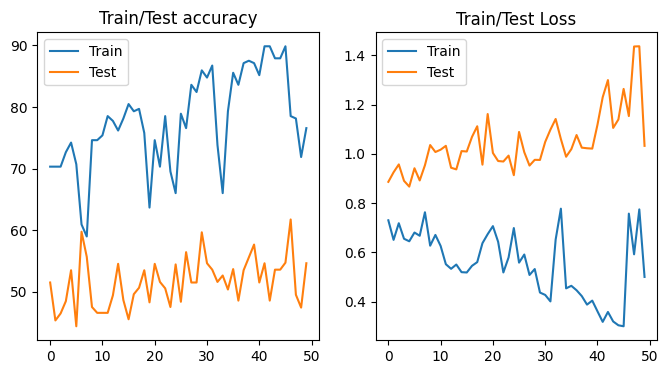

In [ ]:
# for #Epochs=50 and hidden neurons=20
Trlossnum=[t.item() for t in Trloss]
Tslossnum=[t.item() for t in Tsloss]


import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(Tracc,label='Train')
plt.plot(Tsacc,label='Test')
plt.legend()
plt.title("Train/Test accuracy")
plt.subplot(1,2,2)

plt.plot(Trlossnum,label='Train')
plt.plot(Tslossnum,label='Test')
plt.title("Train/Test Loss")
plt.legend()

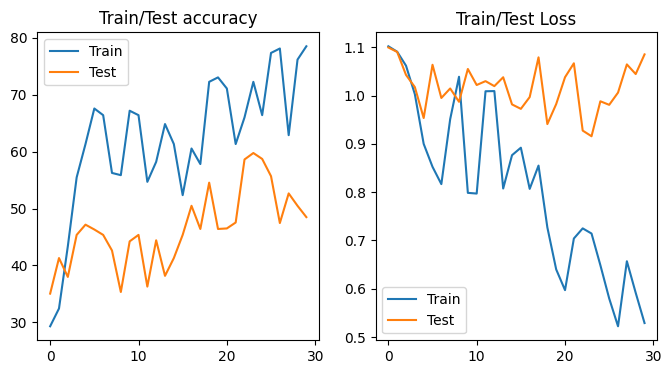

In [ ]:
# for #Epochs=30 and hidden neurons=30
Trlossnum=[t.item() for t in Trloss]
Tslossnum=[t.item() for t in Tsloss]


import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(Tracc,label='Train')
plt.plot(Tsacc,label='Test')
plt.legend()
plt.title("Train/Test accuracy")
plt.subplot(1,2,2)

plt.plot(Trlossnum,label='Train')
plt.plot(Tslossnum,label='Test')
plt.title("Train/Test Loss")
plt.legend()

In [ ]:
#Showing as a Table
import pandas as pd
pd.DataFrame({'Train accuracy':Tracc,'Test accuracy':Tsacc,'Train Loss':Trlossnum,'Test Loss':Tslossnum})

,Train accuracy,Test accuracy,Train Loss,Test Loss
0,33.203125,32.007576,1.120697,1.103114
1,41.406250,43.371212,1.081027,1.071805
2,36.718750,50.378788,1.077875,1.035078
3,45.703125,38.162879,0.999023,1.022722
4,47.265625,42.140152,1.174988,1.000789
5,59.375000,46.401515,0.867370,0.985356
6,60.937500,51.420455,0.907568,0.958597
7,51.953125,38.162879,0.953967,1.019371
8,64.062500,45.359848,0.809897,1.075138
9,66.406250,43.371212,0.842079,1.016930


The Results are not good probably because of small training data. In **04-Excercises** I will try for 20% of original dataset(In this notebook we used(downloaded) 10% of original data.